In [76]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from collections import Counter             # Used to tally the languages

In [77]:
# full_file = ("Resources/survey_results_public.csv")           # Unedited file
full_df_2021 = pd.read_csv("Resources/survey_results_public.csv")                              # Read into full_df pandas dataframe
full_df_2020 = pd.read_csv("Resources/survey_results_public2020.csv")
full_df_2019 = pd.read_csv("Resources/survey_results_public2019.csv")
full_df_2018 = pd.read_csv("Resources/survey_results_public2018.csv")
full_df_2017 = pd.read_csv("Resources/survey_results_public2017.csv")

C:\Users\stade\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
full_df_2017_js = full_df_2017['HaveWorkedLanguage']
full_df_2018_js = full_df_2018['LanguageWorkedWith']
full_df_2019_js = full_df_2019['LanguageWorkedWith']
full_df_2020_js = full_df_2020['LanguageWorkedWith']
full_df_2021_js = full_df_2021['LanguageHaveWorkedWith']

In [79]:
def find_top_langs(df_in):   
    cnt = Counter()                                     # Create a counter object
    temp_list = []                                      # PLace holder list to hold a list of lists
    flat_list = []                                      # "flat" list that makes a 2d list a 1d.  Gets rid of nested list

    # This for loop creates a list from each row in the series and then from that a list to break up the different langs
    # Example String ->  ['C++;Python;PHP'] -> Split ['C++', 'Python', 'PHP'] - For each Row
    for langs in df_in:
        langs = str(langs)
        temp_list.append(langs.split(';'))

    # This opens up the the list of lists and makes it into one gaint list
    for temp in temp_list:              # temp is a list inside a list [[list1], [list2], [list3]]
        for flat in temp:               # flat is the element in list1, list2, list3
            flat_list.append(flat)      # New List with no lists - just elements [list1, list2, list3]

    for temp in flat_list:              # Counts and tallys how many times it is each element
        cnt[temp] += 1

    # cnt                                 # Outputs the data as a dictionary

    cnt_df = pd.DataFrame(cnt.items()).sort_values(by=[1], ascending=False)     # Convert to a dataframe to sort
    return cnt_df


In [80]:
find_top_langs(full_df_2018_js)
top10current2018 = find_top_langs(full_df_2018_js).set_index(0).reset_index().head(10)  
top10current2018  

,0,1
0,JavaScript,54686
1,HTML,53628
2,CSS,50979
3,SQL,44670
4,Java,35521
5,Bash/Shell,31172
6,Python,30359
7,C#,26954
8,PHP,24071
9,nan,20521


In [81]:
find_top_langs(full_df_2019_js)
top10current2019 = find_top_langs(full_df_2019_js).set_index(0).reset_index().head(10)  
top10current2019  

,0,1
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917
5,Bash/Shell/PowerShell,31991
6,C#,27097
7,PHP,23030
8,C++,20524
9,TypeScript,18523


In [82]:
find_top_langs(full_df_2020_js)
top10current2020 = find_top_langs(full_df_2020_js).set_index(0).reset_index().head(10)  
top10current2020  

,0,1
0,JavaScript,38822
1,HTML/CSS,36181
2,SQL,31413
3,Python,25287
4,Java,23074
5,Bash/Shell/PowerShell,18980
6,C#,18041
7,PHP,15007
8,TypeScript,14578
9,C++,13707


In [83]:
find_top_langs(full_df_2021_js)
top10current2021 = find_top_langs(full_df_2021_js).set_index(0).reset_index().head(10) 
top10current2021



,0,1
0,JavaScript,53587
1,HTML/CSS,46259
2,Python,39792
3,SQL,38835
4,Java,29162
5,Node.js,27975
6,TypeScript,24909
7,C#,22984
8,Bash/Shell,22385
9,C++,20057


In [84]:
years_se = []

def make_years_data(df_in, df_col_in):
    temp = df_in.loc[df_col_in.str.contains('JavaScript',  case = False, na=False)]
    return len(temp.index)

years_se.append({'Years': '2017', 'JavaScript': make_years_data(full_df_2017, full_df_2017_js), 'Total Responses': len(full_df_2017.index)})
years_se.append({'Years': '2018', 'JavaScript': make_years_data(full_df_2018, full_df_2018_js), 'Total Responses': len(full_df_2018.index)})
years_se.append({'Years': '2019', 'JavaScript': make_years_data(full_df_2019, full_df_2019_js), 'Total Responses': len(full_df_2019.index)})
years_se.append({'Years': '2020', 'JavaScript': make_years_data(full_df_2020, full_df_2020_js), 'Total Responses': len(full_df_2020.index)})
years_se.append({'Years': '2021', 'JavaScript': make_years_data(full_df_2021, full_df_2021_js), 'Total Responses': len(full_df_2021.index)})
            


# years_se
years_df = pd.DataFrame(years_se)
years_df['Percent'] = years_df['JavaScript'] / years_df['Total Responses'] * 100
years_df

,Years,JavaScript,Total Responses,Percent
0,2017,22875,51392,44.510819
1,2018,54686,98855,55.319407
2,2019,59219,88883,66.625789
3,2020,38822,64461,60.225563
4,2021,53587,83439,64.222965


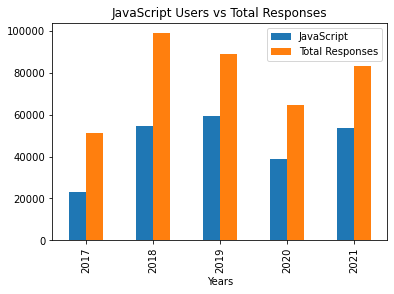

In [86]:
years_df.plot(x="Years", y=["JavaScript", "Total Responses"], kind="bar", title='JavaScript Users vs Total Responses')